# **Notebook used for Training YOLO V5 for ObjectDetection**

*   If you just want to see the model performance, run the first cell and go to the last cell.

*   If you want to retrain the model by yourself run the cells one by one.
if you want to try training the model by yourself, please use the GPU environment in colab.    


In [1]:
!git clone https://github.com/theUnrealSamurai/simple_classifier.git

Cloning into 'simple_classifier'...
remote: Enumerating objects: 1963, done.
remote: Counting objects: 100% (647/647), done.
remote: Compressing objects: 100% (504/504), done.
remote: Total 1963 (delta 110), reused 631 (delta 94), pack-reused 1316
Receiving objects: 100% (1963/1963), 371.48 MiB | 42.79 MiB/s, done.
Resolving deltas: 100% (114/114), done.
Updating files: 100% (1889/1889), done.


In [2]:
# Generating artificial dataset for training the model.

!mkdir /content/slot_machines # creating directory to store the generated images.
!python3 /content/simple_classifier/object_detection/data/data_generator.py --base_path "/content/slot_machines" --img_size 640 --n 500

# img_size is the size of image. 416 x 416 is used here.
# n represents the number of images you want to generate. 500 images generated in this case.
# base path is where you want to store the images.

# The generated images are automatically stored in the yolo format. inside the
# base directory, 2 folders will be created images and labels.
# inside the images directory the images will be stored.
# inside the lables direcotry the labels will be stored in a text file.
# the format for this text files is
# [class_index x_center y_center length width]
# each line contains bounding box for one object.

  2% 10/500 [00:01<01:31,  5.36it/s]
Traceback (most recent call last):
  File "/content/simple_classifier/object_detection/data/data_generator.py", line 150, in <module>
    img, labels = dset[i]
  File "/content/simple_classifier/object_detection/data/data_generator.py", line 113, in __getitem__
    slot_image, id  = get_slot_machine_images('/content/simple_classifier/object_detection/data/raw_images')
  File "/content/simple_classifier/object_detection/data/data_generator.py", line 43, in get_slot_machine_images
    images = glob(os.path.join(path, '*/*.png'))
  File "/usr/lib/python3.10/glob.py", line 24, in glob
    return list(iglob(pathname, root_dir=root_dir, dir_fd=dir_fd, recursive=recursive))
  File "/usr/lib/python3.10/glob.py", line 87, in _iglob
    yield os.path.join(dirname, name)
KeyboardInterrupt
^C


In [4]:
# I am using the yolov5 model from this repository
!git clone https://www.github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15994, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 15994 (delta 18), reused 18 (delta 12), pack-reused 15967
Receiving objects: 100% (15994/15994), 14.64 MiB | 25.16 MiB/s, done.
Resolving deltas: 100% (10980/10980), done.


In [5]:
!pip3 install -r /content/yolov5/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.4/618.4 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00


In [ ]:
# Using the tools inside the repository to train the model for object detection.

# img is the image size. we are using 416. It can be anything but it has to be a multiple of 32.
# the data for the model is fed using a yaml file. The path to the file is given in the below command.
# weights we are using a pretrained yolo model. i.e. yolov5n

# the model is available in different sizes [YOLOv5n, YOLOv5s, YOLOv5m, YOLOv5l, YOLOv5x]
# [nano, small, medium, large, Xlarge] each alphabet in the above list represent this.
# we will be using the nano model. since our task is very simple. I might change this later on based on performance.

%cd /content/yolov5
!python3 train.py --img 416 --epochs 60 --data /content/simple_classifier/object_detection/data/annotated_images/data.yaml --weights yolov5s.pt

/content/yolov5
train: weights=yolov5s.pt, cfg=, data=/content/simple_classifier/object_detection/data/annotated_images/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-215-ga6659d0 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw

In [ ]:
# Exporting the trained model to torchscript to run it on mobile devices

# !python3 /content/yolov5/export.py --weights /content/yolov5/runs/train/exp/weights/best.pt --include coreml
!python3 /content/yolov5/export.py --weights /content/yolov5/runs/train/exp2/weights/best.pt --include torchscript --img 640


export: data=yolov5/data/coco128.yaml, weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript']
YOLOv5 🚀 v7.0-216-gec690e4 Python-3.10.12 torch-2.0.1+cu118 CPU

Traceback (most recent call last):
  File "/content/yolov5/export.py", line 863, in <module>
    main(opt)
  File "/content/yolov5/export.py", line 858, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov5/export.py", line 736, in run
    model = attempt_load(weights, device=device, inplace=True, fuse=True)  # load FP32 model
  File "/content/yolov5/models/experimental.py", line 79, in attempt_

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp /content/yolov5/runs/train/exp2/weights/best.torchscript /content/drive/MyDrive/junk

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-9-25 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


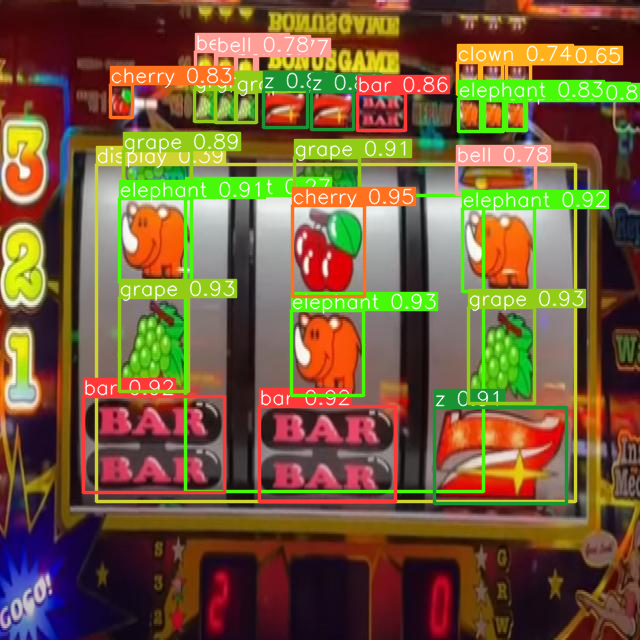

In [9]:
# Once we train the model we can use this code to execute the model and see it's performance.

import torch
from glob import glob

# loading the trained model here.
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/simple_classifier/object_detection/trained_model/yolov5_small/yolov5s_mAP938_P861_R893.pt')


# change the path of the image here

test_images = glob("/content/simple_classifier/object_detection/data/test_data/*.png")
valid_images = glob("/content/simple_classifier/object_detection/data/annotated_images/valid/images/*.jpg")

im = valid_images[7] #this list contains all the images. pick a number from 0-14 to choose a picture for testing.

results = model(im)

results.show()

[292.3963623046875, 205.57601928710938, 364.89434814453125, 296.4158020019531, 0.9524693489074707, 2, 'cherry', 6585.701280955225]
[291.7862854003906, 310.0567626953125, 363.4183044433594, 395.8184814453125, 0.931679904460907, 5, 'elephant', 6143.28507065773]
[119.79586791992188, 297.3605041503906, 188.87606811523438, 391.0818786621094, 0.9313821792602539, 6, 'grape', 6474.29131384939]
[468.175537109375, 307.43389892578125, 534.3524169921875, 403.27484130859375, 0.9297261834144592, 6, 'grape', 6342.454531922936]
[462.6264953613281, 208.45846557617188, 534.4931640625, 291.17559814453125, 0.9212549328804016, 5, 'elephant', 5944.604762201197]
[259.8716125488281, 406.210205078125, 395.4402160644531, 501.5003662109375, 0.91722571849823, 0, 'bar', 12918.354073554277]
[83.18970489501953, 396.37677001953125, 224.7354736328125, 492.7701416015625, 0.91721510887146, 0, 'bar', 13644.07388180634]
[294.34417724609375, 157.27146911621094, 359.10125732421875, 197.15855407714844, 0.9126316905021667, 6,

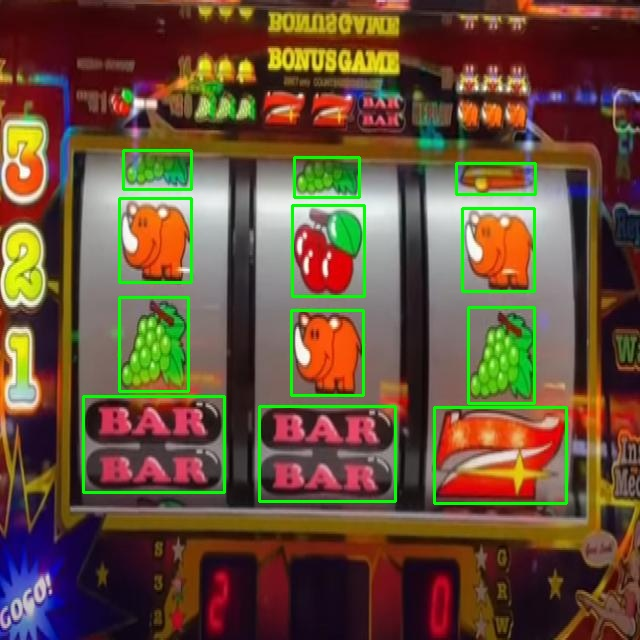

In [48]:
import cv2
import numpy as np

def save_image_with_boxes(image_path, bounding_boxes, output_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Draw bounding boxes on the image
    for bbox in bounding_boxes:
        xmin, ymin, xmax, ymax = bbox[:4]
        cv2.rectangle(image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)  # Green rectangle

    # Save the image with bounding boxes
    cv2.imwrite(output_path, image)


def is_bbox_inside(bbox1, bbox2):
    """
    Check if at least 50% of bbox2 is inside bbox1.

    Args:
    bbox1 (list): Coordinates of the first bounding box in the format [x1, y1, x2, y2].
    bbox2 (list): Coordinates of the second bounding box in the format [x1, y1, x2, y2].

    Returns:
    bool: True if at least 50% of bbox2 is inside bbox1, False otherwise.
    """
    x1, y1, x2, y2 = bbox1
    x3, y3, x4, y4 = bbox2

    # Calculate the area of bbox1 and bbox2
    area_bbox1 = (x2 - x1) * (y2 - y1)
    area_bbox2 = (x4 - x3) * (y4 - y3)

    # Calculate the coordinates of the intersection between bbox1 and bbox2
    inter_x1 = max(x1, x3)
    inter_y1 = max(y1, y3)
    inter_x2 = min(x2, x4)
    inter_y2 = min(y2, y4)

    # Calculate the area of the intersection
    area_intersection = max(0, inter_x2 - inter_x1) * max(0, inter_y2 - inter_y1)

    # Check if at least 50% of bbox2 is inside bbox1
    if area_intersection >= 0.5 * area_bbox2:
        return True
    else:
        return False


def get_area(box):
    box = box[:4]
    xmin, ymin, xmax, ymax = box
    width = xmax - xmin
    height = ymax - ymin
    area = width * height
    return area


def remove_outliers_zscore(data, threshold=3):
    data = np.array(data)
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    filtered_data = data[z_scores < threshold]
    return filtered_data.tolist()


def remove_unnecessary_boxes(df, img_path, out_path="/content/temp.jpg"):
    display = list(df[df["name"] == 'display'].values[0])[:4]

    df = df[df['name'] != 'display']

    bboxes = []

    for bbox in df.values:
        bbox1 = list(bbox)[:4]
        if is_bbox_inside(display, bbox1):
            bboxes.append(list(bbox))

    box_with_areas = []
    box_areas = []

    for i in bboxes:
        box_areas.append(get_area(i))
        i.append(get_area(i))
        box_with_areas.append(i)

    box_areas_removed_outlier = remove_outliers_zscore(box_areas)

    final_bboxes = []

    for i in box_with_areas:
        if i[-1] not in box_areas_removed_outlier:
            continue
        final_bboxes.append(i)

    save_image_with_boxes(img_path, final_bboxes, out_path)
    return final_bboxes


for i in remove_unnecessary_boxes(results.pandas().xyxy[0], im):
    print(i)

from IPython.display import Image, display

image_path = '/content/temp.jpg'
display(Image(filename=image_path))
